In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

In [9]:
def visualize_letter_plot(vec, width=5, title="字母像素（5×5）"):
    """用 matplotlib 画出 5×5 像素图，课堂投屏更直观。"""
    grid = np.array(vec, dtype=float).reshape((width, width))
    plt.figure(figsize=(3, 3))
    plt.imshow(grid, cmap='Greys', vmin=0, vmax=1)
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    # 加细网格线，帮助学生观察
    for i in range(width+1):
        plt.axhline(i-0.5, color='lightgray', linewidth=0.5)
        plt.axvline(i-0.5, color='lightgray', linewidth=0.5)
    plt.tight_layout()
    plt.show()

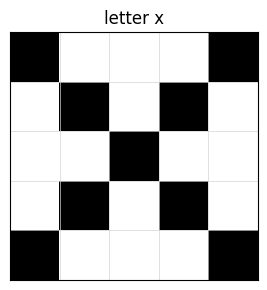

In [26]:
letter_X = [1,0,0,0,1,
     0,1,0,1,0,
     0,0,1,0,0,
     0,1,0,1,0,
     1,0,0,0,1]
visualize_letter_plot(letter_X,title='letter x')

In [27]:
#准备数据 (X: 字母的像素数据, y: 对应的字母标签)
# (此处展示预先准备好的几个字母的0/1列表和标签)
X = [
    # A
    [0,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,1,
     1,0,0,0,1,
     1,0,0,0,1],
    # B
    [1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0],
    # C
    [0,1,1,1,1,
     1,0,0,0,0,
     1,0,0,0,0,
     1,0,0,0,0,
     0,1,1,1,1],
    # D
    [1,1,1,0,0,
     1,0,0,1,0,
     1,0,0,1,0,
     1,0,0,1,0,
     1,1,1,0,0],
    # E
    [1,1,1,1,1,
     1,0,0,0,0,
     1,1,1,1,0,
     1,0,0,0,0,
     1,1,1,1,1],
]
y = ['A','B','C','D','E']

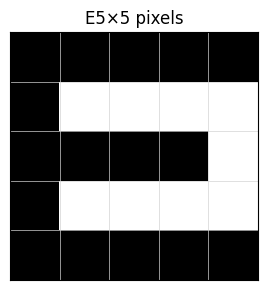

In [28]:
visualize_letter_plot(X[4], width=5, title=y[4]+"5×5 pixels")

In [29]:
# 3. 定义并创建神经网络模型
# 【学生易错点】这里的参数需要详细解释
mlp = MLPClassifier(
    hidden_layer_sizes=(30, 20), # 定义了两个隐藏层，第一个有30个神经元，第二个有20个
    max_iter=2000,              # 最大“学习轮数”（农场总管最多学习2000季）
    solver='adam',              # 这是高效的“权重调整”算法
    random_state=42             # 保证我们每次运行结果都一样，方便教学
)
print("神经网络模型创建成功！")

# 4. 训练模型 (这就是“反向传播”学习的过程)
mlp.fit(X, y)
print("模型训练完成！它已经学会了识别这些字母。")

# 5. 进行预测
# 我们可以创建一个带有一点“噪声”（错误像素）的'A'
noisy_A = [0,1,1,1,0, 1,0,0,0,1, 1,0,1,1,1, 1,0,0,0,1, 1,0,0,0,1] # 中间故意改错了一位
prediction = mlp.predict([noisy_A])
print(f"对于这个有点瑕疵的字母，模型的识别结果是: {prediction[0]}")

神经网络模型创建成功！
模型训练完成！它已经学会了识别这些字母。
对于这个有点瑕疵的字母，模型的识别结果是: A


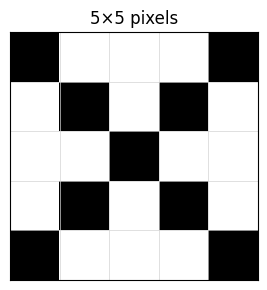

In [30]:
letter_X = [
    1,0,0,0,1,
    0,1,0,1,0,
    0,0,1,0,0,
    0,1,0,1,0,
    1,0,0,0,1,
]
visualize_letter_plot(letter_X, width=5, title="5×5 pixels")

In [31]:
prediction = mlp.predict([letter_X])
print(f"，模型的识别结果是: {prediction[0]}")

，模型的识别结果是: E
